In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import sys
import numpy
import pandas as pd
import tensorflow as tf
from keras import layers
import keras


#taking the model
#from VAE_model_extended_moreDKL import *
from VAE_testDK_Reco_Loss import *
import matplotlib.pyplot as plt

import ROOT

In [3]:
ROOT.ROOT.EnableImplicitMT()
#RDataFrame = ROOT.RDF.Experimental.Distributed.Spark.RDataFrame

In [4]:
DEBUGGING_MODE = True

def pdf_summary(pdf, debugging_mode=DEBUGGING_MODE):
    print(f"Pandas DataFrame shape is: {pdf.shape}")
    if debugging_mode:
        return pdf.head(2)

### variable from the nutple

In [5]:
#pd_variables = ['deltaetajj', 'deltaphijj', 'etaj1', 'etaj2', 'etal1', 'etal2',
#       'met', 'mjj', 'mll',  'ptj1', 'ptj2', 'ptl1',
#       'ptl2', 'ptll']#,'phij1', 'phij2', 'w']
#kinematicFilter = "ptj1 > 30 && ptj2 >30 && deltaetajj>2 && mjj>200"
kinematicFilter = "ptj1 > 30 && abs(etaj1-etaj2) > 2. && ptj2 >30 && mjj>200"
ntuple_location = "../../ntuples4Momentum/"

In [6]:
dfSM = ROOT.RDataFrame("SSWW_SM",ntuple_location+"ntuple_SSWW_SM.root")
dfSM = dfSM.Filter(kinematicFilter)
dfBSM = ROOT.RDataFrame("SSWW_cW_QU",ntuple_location+"ntuple_SSWW_cW_QU.root")
dfBSM = dfBSM.Filter(kinematicFilter)
np_SM = dfSM.AsNumpy()
wSM = dfSM.AsNumpy(["w"])
npd = pd.DataFrame.from_dict(np_SM)
pdf_summary(npd)

Pandas DataFrame shape is: (895962, 33)


,Ej1,Ej2,El1,El2,etaj1,etaj2,etal1,etal2,met,mjj,...,pxl2,pyj1,pyj2,pyl1,pyl2,pzj1,pzj2,pzl1,pzl2,w
0,129.271149,467.440796,44.039688,363.361450,2.135209,-1.535490,0.443069,1.148970,16.711147,489.437683,...,-191.486572,-8.057958,58.263187,34.427784,-84.532700,125.707581,-426.006592,18.328659,297.016266,0.005535
1,118.335892,557.729614,69.654358,133.686005,2.037012,-2.316609,1.517704,1.215194,5.995552,511.977417,...,17.623850,-27.167337,105.483910,-12.694059,-70.738693,114.377716,-546.987976,63.266830,112.059738,0.005535


In [7]:
npd.drop(['w','phil1','phil2',"phij1","phij2"],axis='columns', inplace=True)
pdf_summary(npd)

Pandas DataFrame shape is: (895962, 28)


,Ej1,Ej2,El1,El2,etaj1,etaj2,etal1,etal2,met,mjj,...,pxl1,pxl2,pyj1,pyj2,pyl1,pyl2,pzj1,pzj2,pzl1,pzl2
0,129.271149,467.440796,44.039688,363.361450,2.135209,-1.535490,0.443069,1.148970,16.711147,489.437683,...,20.451946,-191.486572,-8.057958,58.263187,34.427784,-84.532700,125.707581,-426.006592,18.328659,297.016266
1,118.335892,557.729614,69.654358,133.686005,2.037012,-2.316609,1.517704,1.215194,5.995552,511.977417,...,26.227827,17.623850,-27.167337,105.483910,-12.694059,-70.738693,114.377716,-546.987976,63.266830,112.059738


In [8]:
wpdSM = pd.DataFrame.from_dict(wSM)
pdf_summary(wpdSM)

Pandas DataFrame shape is: (895962, 1)


,w
0,0.005525
1,0.005525


In [9]:
# Take all columns og dfBSM because of using RDateFrame.AsNumpy() without any filter
np_BSM = dfBSM.AsNumpy()
wBSM = dfBSM.AsNumpy(["w"])
npd_BSM = pd.DataFrame.from_dict(np_BSM)
pdf_summary(npd_BSM)

Pandas DataFrame shape is: (654461, 33)


,Ej1,Ej2,El1,El2,etaj1,etaj2,etal1,etal2,met,mjj,...,pxl2,pyj1,pyj2,pyl1,pyl2,pzj1,pzj2,pzl1,pzl2,w
0,332.367523,169.273438,105.026199,85.704247,-2.04957,0.859130,1.270887,-0.424360,191.871582,428.995972,...,68.573677,80.843719,57.391773,-54.482666,38.263832,-321.521515,117.782005,89.696365,-34.332897,0.003928
1,527.212891,1320.632935,45.115250,1217.655884,1.08716,-1.584019,0.232504,0.767927,163.655807,1453.422729,...,-627.324707,-217.872452,-485.057495,7.426074,686.245239,419.576782,-1213.961792,10.304476,786.267883,0.003928


In [10]:
npd_BSM.drop(['w','phil1','phil2',"phij1","phij2"],axis='columns', inplace=True)
wpdBSM = pd.DataFrame.from_dict(wBSM)
pdf_summary(wpdBSM)

Pandas DataFrame shape is: (654461, 1)


,w
0,0.003936
1,0.003936


In [11]:
nEntries = 3000000
npd = npd.head(nEntries)
npd_BSM = npd_BSM.head(nEntries)
wpdSM = wpdSM.head(nEntries)
wpdBSM = wpdBSM.head(nEntries)

In [12]:
# #to be done for all the pt and mass and met variables
for var in ['met', 'mjj', 'mll',  'ptj1', 'ptj2', 'ptl1',
            'ptl2', 'ptll',"Ej1","Ej2","El1","El2"]:
   npd[var] = np.log10(npd[var])
   npd_BSM[var] = np.log10(npd_BSM[var])
pdf_summary(npd)

Pandas DataFrame shape is: (895962, 28)


,Ej1,Ej2,El1,El2,etaj1,etaj2,etal1,etal2,met,mjj,...,pxl1,pxl2,pyj1,pyj2,pyl1,pyl2,pzj1,pzj2,pzl1,pzl2
0,2.111502,2.669727,1.643844,2.560339,2.135209,-1.535490,0.443069,1.148970,1.223006,2.689698,...,20.451946,-191.486572,-8.057958,58.263187,34.427784,-84.532700,125.707581,-426.006592,18.328659,297.016266
1,2.073117,2.746424,1.842948,2.126086,2.037012,-2.316609,1.517704,1.215194,0.777829,2.709251,...,26.227827,17.623850,-27.167337,105.483910,-12.694059,-70.738693,114.377716,-546.987976,63.266830,112.059738


### Combining SM and BSM data

In [13]:
Y_true_SM = np.full(npd.shape[0],0)
Y_true_BSM = np.full(npd_BSM.shape[0],1)
labels_arr = np.concatenate((Y_true_SM,Y_true_BSM))

In [14]:
samples_df = pd.concat([npd,npd_BSM])
pdf_summary(samples_df)

Pandas DataFrame shape is: (1550423, 28)


,Ej1,Ej2,El1,El2,etaj1,etaj2,etal1,etal2,met,mjj,...,pxl1,pxl2,pyj1,pyj2,pyl1,pyl2,pzj1,pzj2,pzl1,pzl2
0,2.111502,2.669727,1.643844,2.560339,2.135209,-1.535490,0.443069,1.148970,1.223006,2.689698,...,20.451946,-191.486572,-8.057958,58.263187,34.427784,-84.532700,125.707581,-426.006592,18.328659,297.016266
1,2.073117,2.746424,1.842948,2.126086,2.037012,-2.316609,1.517704,1.215194,0.777829,2.709251,...,26.227827,17.623850,-27.167337,105.483910,-12.694059,-70.738693,114.377716,-546.987976,63.266830,112.059738


In [15]:
samples_df['labels'] = labels_arr
pdf_summary(samples_df)

Pandas DataFrame shape is: (1550423, 29)


,Ej1,Ej2,El1,El2,etaj1,etaj2,etal1,etal2,met,mjj,...,pxl2,pyj1,pyj2,pyl1,pyl2,pzj1,pzj2,pzl1,pzl2,labels
0,2.111502,2.669727,1.643844,2.560339,2.135209,-1.535490,0.443069,1.148970,1.223006,2.689698,...,-191.486572,-8.057958,58.263187,34.427784,-84.532700,125.707581,-426.006592,18.328659,297.016266,0
1,2.073117,2.746424,1.842948,2.126086,2.037012,-2.316609,1.517704,1.215194,0.777829,2.709251,...,17.623850,-27.167337,105.483910,-12.694059,-70.738693,114.377716,-546.987976,63.266830,112.059738,0


In [16]:
samples_df = samples_df.sample(frac=1)
pdf_summary(samples_df)

Pandas DataFrame shape is: (1550423, 29)


,Ej1,Ej2,El1,El2,etaj1,etaj2,etal1,etal2,met,mjj,...,pxl2,pyj1,pyj2,pyl1,pyl2,pzj1,pzj2,pzl1,pzl2,labels
513238,2.200078,2.853812,1.426788,1.822237,2.021278,-2.443966,0.021212,-0.278658,1.768867,2.826344,...,20.789679,-2.223737,85.303436,25.971695,-60.437298,153.049149,-703.502502,0.566644,-18.041286,0
889484,2.405785,2.800519,1.729900,2.348885,1.084929,-1.958234,0.985262,0.446668,1.799159,2.887331,...,197.725281,90.667671,-174.169571,34.839470,44.793411,202.377670,-607.046204,40.554592,93.596764,0


In [17]:
shuffled_labels_df = samples_df['labels']

In [18]:
shuffled_samples_df = samples_df.drop(['labels'], axis='columns')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_samples_df, 
                                                    shuffled_labels_df, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    )
SM_train,SM_test,_,_ = train_test_split(npd, npd, test_size=0.2, random_state=1)
BSM_train,BSM_test,_,_ = train_test_split(npd_BSM, npd_BSM, test_size=0.2, random_state=1)
#wx_train, wx_test, wy_train, wy_test = train_test_split(wpdSM, wpdSM, test_size=0.2, random_state=1)

#BSM_train, BSM_test, y_BSM_train, y_BSM_test = train_test_split(npd_BSM, Y_true_BSM, test_size=0.2, random_state=1)
#wBSM_train, wBSM_test, _ , _ = train_test_split(wpdBSM, wpdBSM, test_size=0.2, random_state=1)
#print wx_train,X_train
#wx = wx_train["w"].to_numpy()
#wxtest = wx_test["w"].to_numpy()
#wBSM = wBSM_train["w"].to_numpy()
#wBSMtest = wBSM_test["w"].to_numpy()

In [20]:
# scale data

scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(SM_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
BSM_test = scaler.transform(BSM_test)

In [21]:
n_inputs = npd.shape[1]
original_dim = n_inputs

intermediate_dim = 50 #50 by default
input_dim = 10 #was 20 in default
half_input = 7 #was 20 in the newTest
latent_dim = 10 #tried 7 as well  #was 3 for optimal performance
epochs = 20 #80
batch_size=64 #32
nameExtenstion = str(intermediate_dim) + "_" +\
                 str(input_dim) + "_" +\
                 str(half_input) + "_" +\
                 str(latent_dim) + "_" +\
                 str(epochs) + "_" +\
                 str(batch_size)


In [21]:
vae = VariationalAutoEncoder(original_dim, 
                             intermediate_dim, 
                             input_dim, 
                             half_input, 
                             latent_dim,
                             )  
#vae.compile(
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  
#               loss=tf.keras.losses.MeanSquaredError()
#           )
#vae.compile(
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
#               run_eagerly=True, loss="binary_crossentropy",
#               metrics = [tf.keras.metrics.BinaryAccuracy()]
#           )
#vae.compile(
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
#               loss_weights=[0.1],loss="binary_crossentropy",
#               metrics = [tf.keras.metrics.BinaryAccuracy()]
#           )
vae.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss="binary_crossentropy",
                metrics = [tf.keras.metrics.BinaryAccuracy()]
            )
hist = vae.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=epochs, batch_size = batch_size) 
#print "new model: ", vae.summary()
encoderDecoder =  EncoderDecoder(original_dim,intermediate_dim,input_dim,half_input,latent_dim)
reco = encoderDecoder.predict(X_test)
#encoder = LatentSpace(intermediate_dim,input_dim,half_input,latent_dim)
#z = encoder.predict(X_train)

Epoch 1/20
19381/19381 [==============================] - 167s 9ms/step - loss: 0.3645 - binary_accuracy: 0.8673 - val_loss: 0.3095 - val_binary_accuracy: 0.8897
Epoch 2/20
19381/19381 [==============================] - 159s 8ms/step - loss: 0.3086 - binary_accuracy: 0.8885 - val_loss: 0.3000 - val_binary_accuracy: 0.8908
Epoch 3/20
19381/19381 [==============================] - 153s 8ms/step - loss: 0.3026 - binary_accuracy: 0.8895 - val_loss: 0.2978 - val_binary_accuracy: 0.8906
Epoch 4/20
19381/19381 [==============================] - 151s 8ms/step - loss: 0.2996 - binary_accuracy: 0.8901 - val_loss: 0.2945 - val_binary_accuracy: 0.8915
Epoch 5/20
19381/19381 [==============================] - 153s 8ms/step - loss: 0.2979 - binary_accuracy: 0.8902 - val_loss: 0.2924 - val_binary_accuracy: 0.8923
Epoch 6/20
19381/19381 [==============================] - 160s 8ms/step - loss: 0.2968 - binary_accuracy: 0.8907 - val_loss: 0.2933 - val_binary_accuracy: 0.8917
Epoch 7/20
19381/19381 [====

2022-07-22 15:11:20.688354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-22 15:11:20.688438: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-22 15:11:20.688487: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-07-22 15:11:20.689038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-22 15:11:21.169351: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138917856 exceeds

In [22]:
keras.models.save_model(encoderDecoder,'encoderDecoder_newModelUsingKL_Reco_Loss_newWayToAddUpSamples_'+nameExtenstion)
keras.models.save_model(vae,'vae_newModelUsingKL_Reco_Loss_newWayToAddUpSamples_'+nameExtenstion)
#numpy.savetxt("lossVAE_test_newModelDimenstions_MinMaxScaler_"+nameExtenstion+".csv",hist.history["loss"],delimiter=",")
#vae=tf.keras.models.load_model('vae_test_newModelUsingLatentSpace_'+nameExtenstion)

INFO:tensorflow:Assets written to: encoderDecoder_newModelUsingKL_Reco_Loss_newWayToAddUpSamples_50_10_7_10_20_64/assets


INFO:tensorflow:Assets written to: encoderDecoder_newModelUsingKL_Reco_Loss_newWayToAddUpSamples_50_10_7_10_20_64/assets


INFO:tensorflow:Assets written to: vae_newModelUsingKL_Reco_Loss_newWayToAddUpSamples_50_10_7_10_20_64/assets


INFO:tensorflow:Assets written to: vae_newModelUsingKL_Reco_Loss_newWayToAddUpSamples_50_10_7_10_20_64/assets


In [23]:
output_SM = vae.predict(X_test)
output_BSM = vae.predict(BSM_test)

4091/4091 [==============================] - 13s 3ms/step


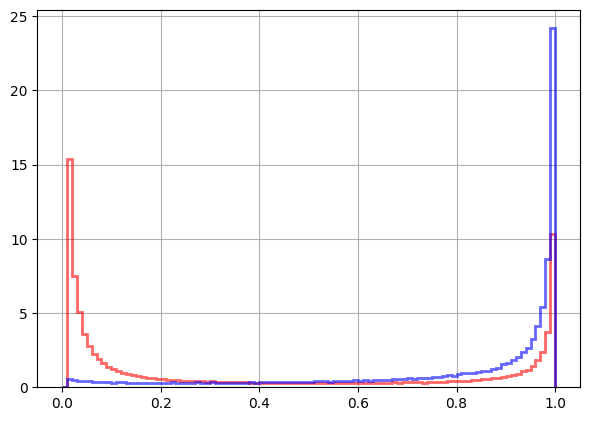

In [25]:
#print output_SM
#print output_BSM
bins=100
ax = plt.figure(figsize=(7,5), dpi=100, facecolor="w").add_subplot(111)
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.hist(output_SM,bins=bins, density=1,range=[0.,1.],histtype="step",color="red",alpha=0.6,linewidth=2,label="SM Output")                        
ax.hist(output_BSM,bins=bins, density=1,range=[0.,1.],histtype="step",color="blue",alpha=0.6,linewidth=2,label="BSM Output")                        
plt.rc('legend',fontsize='small')    
plt.show()

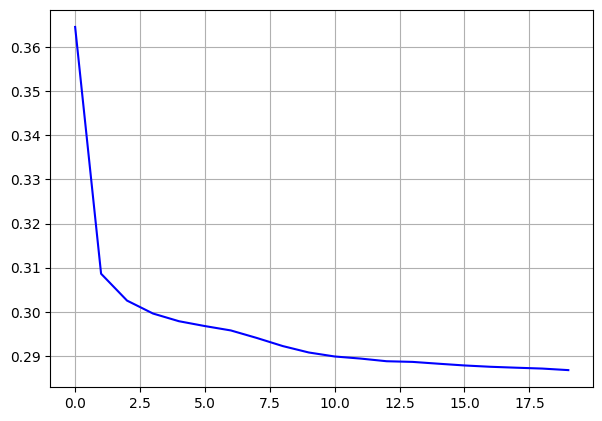

In [26]:
x_bins = range(len(hist.history["loss"]))
ax = plt.figure(figsize=(7,5), dpi=100, facecolor="w").add_subplot(111)
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.plot(x_bins,hist.history["loss"],color="blue",label="training losss")                        
plt.rc('legend',fontsize='small')    
plt.show()